In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>


In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

<AxesSubplot:>

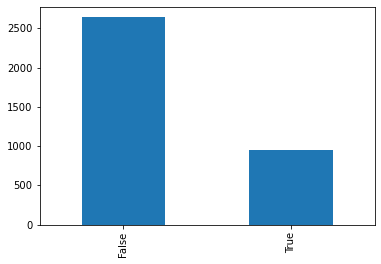

In [4]:
data['Churn'].value_counts().plot(kind='bar')

In [5]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges
Index,,,
927,0,62,81.00
3072,0,72,105.60
1045,0,1,19.85
3505,0,14,76.45
3469,0,19,24.85


In [6]:
data.TotalCharges.value_counts().head(10)

20.2     6
19.55    6
         6
20.05    4
20.3     4
19.9     4
45.3     4
20.5     4
24.4     3
44       3
Name: TotalCharges, dtype: int64

In [7]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [8]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges,TotalCharges
Index,,,,
1493,0,71,87.25,6328.7
2529,1,35,70.55,2419.0
3548,1,13,106.90,1364.3
1590,0,5,80.15,385.0
3193,1,15,89.00,1288.3


In [9]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                    })

In [10]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Tenure,Phone,MonthlyCharges,TotalCharges
Index,,,,,,,
2692,0,0,1,2,1,20.00,38.00
3018,1,0,0,13,1,85.95,1215.65
1581,0,0,0,4,1,90.05,368.10
801,0,0,0,31,0,50.05,1523.40
2353,0,0,1,25,1,61.60,1611.00


<AxesSubplot:>

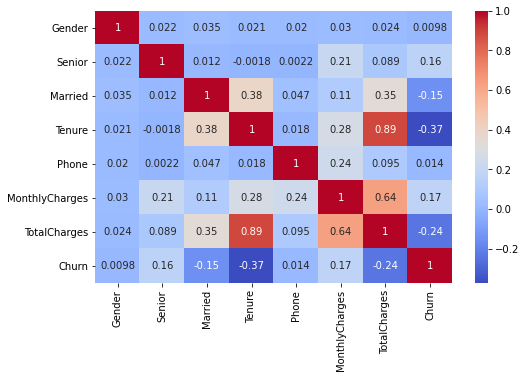

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(data[numeric_data.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(numeric_data, 
                                                    data.Churn,
                                                    test_size = 0.25,
                                                    random_state = 1)


In [13]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)

dummy_predictions = dummy.predict(X_train)


              precision    recall  f1-score   support

       False       0.73      1.00      0.84      1967
        True       0.00      0.00      0.00       726

    accuracy                           0.73      2693
   macro avg       0.37      0.50      0.42      2693
weighted avg       0.53      0.73      0.62      2693



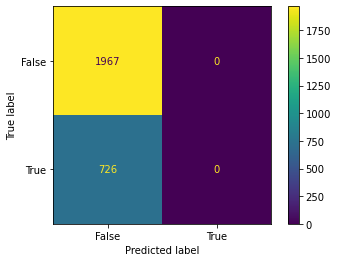

In [14]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print (classification_report(Y_train, dummy_predictions))

plot_confusion_matrix(estimator=dummy, X= X_train, y_true=Y_train)

              precision    recall  f1-score   support

       False       0.75      1.00      0.86       672
        True       0.00      0.00      0.00       226

    accuracy                           0.75       898
   macro avg       0.37      0.50      0.43       898
weighted avg       0.56      0.75      0.64       898



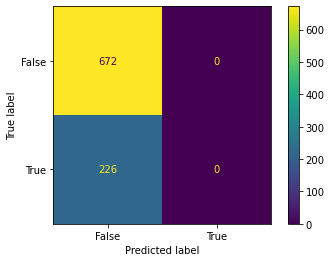

In [15]:
print (classification_report(Y_test, dummy.predict(X_test)))

plot_confusion_matrix(estimator=dummy, X= X_test, y_true=Y_test)

Train evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1967
        True       1.00      0.99      0.99       726

    accuracy                           1.00      2693
   macro avg       1.00      0.99      1.00      2693
weighted avg       1.00      1.00      1.00      2693



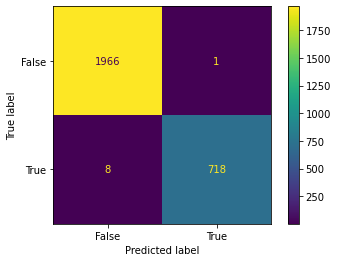

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_train_predictions = dt.predict (X_train)

print('Train evaluation')
print(classification_report(Y_train, dt_train_predictions))
plot_confusion_matrix(estimator = dt, X= X_train, y_true=Y_train)


Tree depth: 23


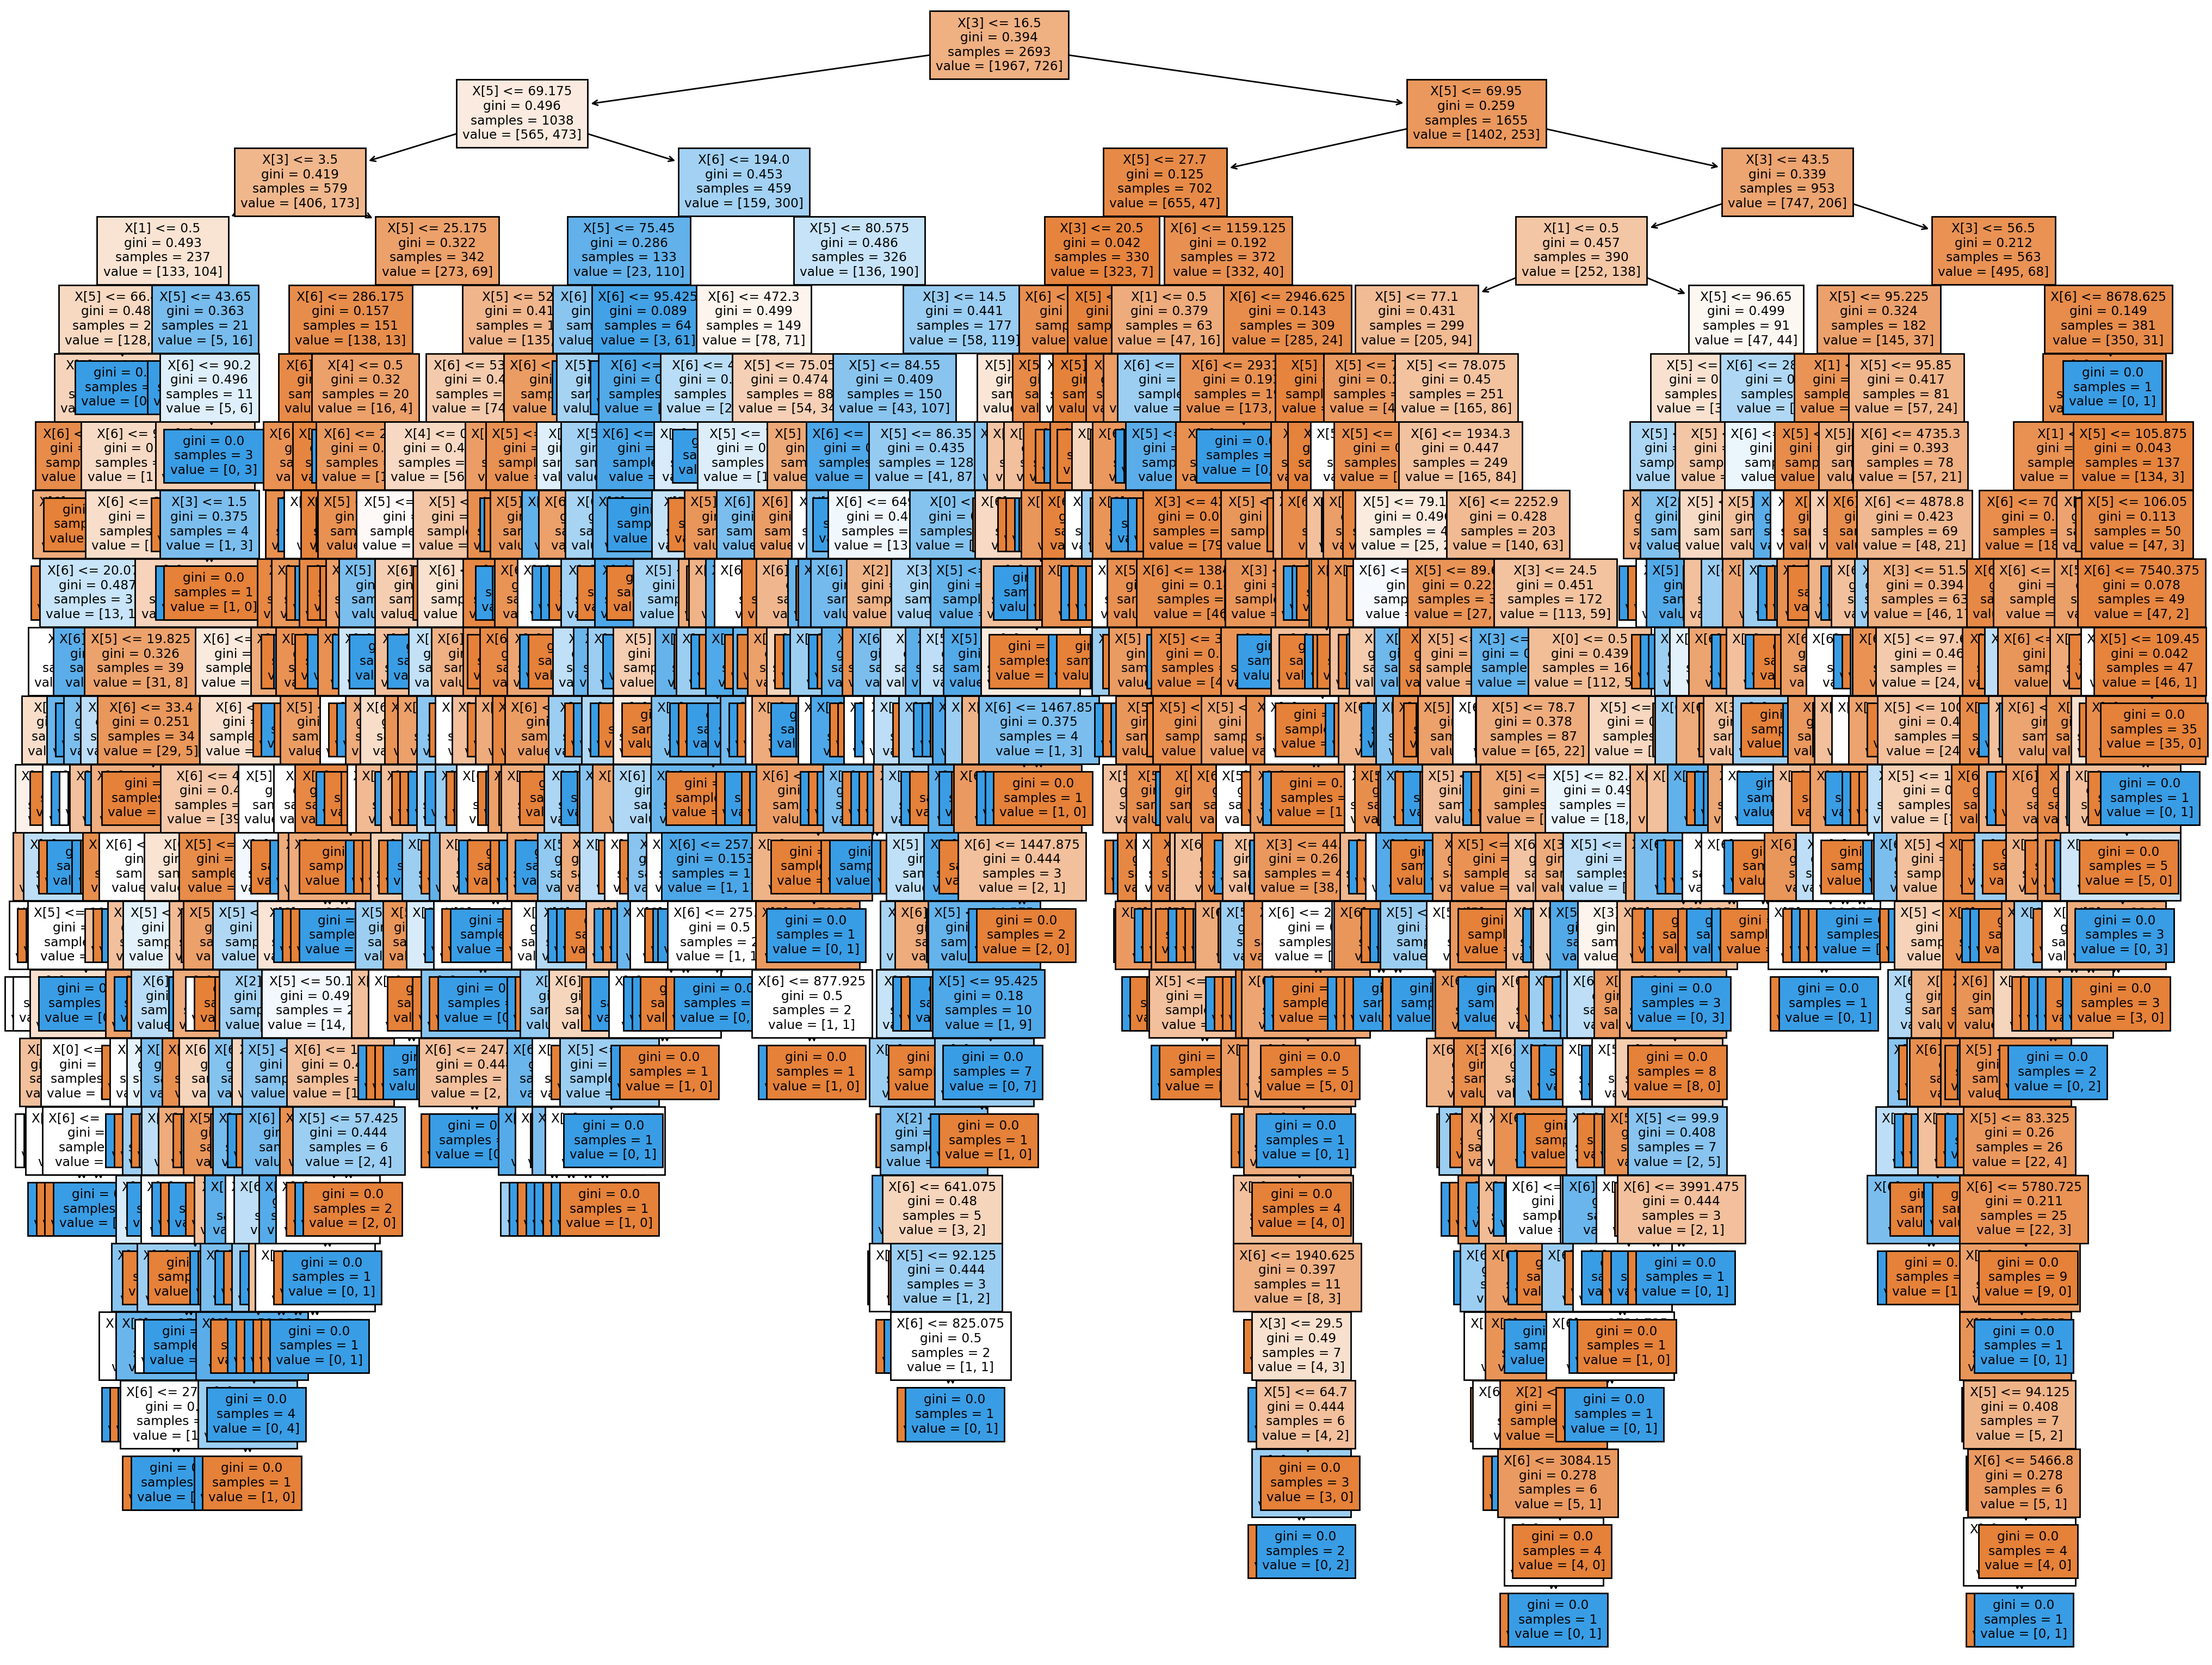

In [17]:
from sklearn.tree import plot_tree

print (f'Tree depth: {dt.get_depth()}')
fig = plt.figure(figsize=(25, 20), dpi=200)

plot_tree(dt, filled=True, ax=fig.gca(), fontsize='small');

Test evaluation
              precision    recall  f1-score   support

       False       0.81      0.81      0.81       672
        True       0.44      0.44      0.44       226

    accuracy                           0.72       898
   macro avg       0.62      0.62      0.62       898
weighted avg       0.72      0.72      0.72       898



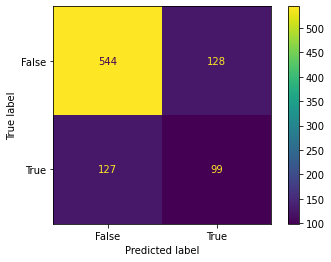

In [18]:
dt_test_predictions = dt.predict (X_test)

print('Test evaluation')
print(classification_report(Y_test, dt_test_predictions))

plot_confusion_matrix(estimator = dt, X= X_test, y_true=Y_test)

In [19]:
smart_dt = DecisionTreeClassifier(min_samples_leaf = 7, max_depth = 17).fit(X_train, Y_train)
print (f'Tree depth: {smart_dt.get_depth()}')

print('Train evaluation')
sdt_train_predictions = smart_dt.predict (X_train)
print(classification_report(Y_train, sdt_train_predictions))

print('Test evaluation')
sdt_test_predictions = smart_dt.predict (X_test)
print(classification_report(Y_test, sdt_test_predictions))


Tree depth: 15
Train evaluation
              precision    recall  f1-score   support

       False       0.88      0.93      0.90      1967
        True       0.77      0.64      0.70       726

    accuracy                           0.85      2693
   macro avg       0.82      0.78      0.80      2693
weighted avg       0.85      0.85      0.85      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       672
        True       0.53      0.45      0.49       226

    accuracy                           0.76       898
   macro avg       0.67      0.66      0.66       898
weighted avg       0.75      0.76      0.75       898



In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

tree_params = {'min_samples_leaf': [5, 7, 9, 11],
               'max_depth': [12, 15, 17, 19],
               'criterion': ['gini', 'entropy']              
              }

grid = GridSearchCV(DecisionTreeClassifier(),
                    tree_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.6s finished


In [21]:
grid.best_score_

0.6738657476539591

In [22]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 7}

In [23]:
print('Train evaluation')
gbm_train_predictions = grid_best_model.predict (X_train)
print(classification_report(Y_train, gbm_train_predictions))

print('Test evaluation')
gbm_test_predictions = grid_best_model.predict (X_test)
print(classification_report(Y_test, gbm_test_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       0.86      0.94      0.90      1967
        True       0.78      0.58      0.67       726

    accuracy                           0.84      2693
   macro avg       0.82      0.76      0.78      2693
weighted avg       0.84      0.84      0.84      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.82      0.89      0.85       672
        True       0.54      0.40      0.46       226

    accuracy                           0.77       898
   macro avg       0.68      0.64      0.66       898
weighted avg       0.75      0.77      0.75       898



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 5, n_jobs = -1)

print('Train evaluation')
print(classification_report(Y_train, cv_lr_predictions))


Train evaluation
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1967
        True       0.65      0.47      0.55       726

    accuracy                           0.79      2693
   macro avg       0.74      0.69      0.71      2693
weighted avg       0.78      0.79      0.78      2693



In [25]:

lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict (X_test)
print(classification_report(Y_test, lr_test_predictions))


Test evaluation
              precision    recall  f1-score   support

       False       0.84      0.93      0.88       672
        True       0.69      0.48      0.56       226

    accuracy                           0.81       898
   macro avg       0.76      0.70      0.72       898
weighted avg       0.80      0.81      0.80       898



In [26]:
category_data = data.select_dtypes(exclude=np.number)
category_data.sample(5)

,Dependents,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,Churn
Index,,,,,,,,,,,,,
304,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),False
1196,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,False
2593,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),False
1524,Yes,Yes,DSL,Yes,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),False
1702,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,False
